<a href="https://colab.research.google.com/github/TANKIANAUN/Machine-Learning/blob/master/LinearRegressionML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
data = pd.read_csv("student-mat.csv", sep=";")
# Since our data is seperated by semicolons we need to do sep=";"
print(data.head())
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
predict = "G3"

X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)



  school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]


In [5]:
linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

0.7881949349739564
Coefficient: 
 [ 0.16397577  0.96472399 -0.19216944 -0.42443124  0.03505907]
Intercept: 
 -1.3906660623622198
10.448522891461648 [11 11  3  0  0] 10
6.547798974300127 [9 8 1 3 6] 10
15.295727616656935 [15 15  2  0  4] 15
15.061633713286374 [14 15  2  0  2] 15
5.8874417250636695 [7 8 2 3 2] 9
7.769159521417539 [ 9  8  2  0 10] 8
8.996325781571986 [ 6 10  2  0  4] 10
9.471378981359683 [ 9 10  3  0  9] 9
14.99151557762911 [14 15  2  0  0] 15
11.953384925426244 [14 12  2  1  8] 12
8.663765370893335 [9 9 2 0 8] 9
6.289869090284868 [8 7 2 0 0] 8
4.172705855906686 [6 5 2 0 4] 6
8.060316366828273 [ 9  9  2  2 15] 9
4.24282399156395 [6 5 2 0 6] 6
14.289079170648659 [14 14  1  0  2] 13
18.21363906845488 [16 18  2  0  0] 19
6.167914267692723 [ 7  8  2  3 10] 10
5.51176001572483 [ 7  6  2  0 10] 6
10.64069233395699 [11 11  2  0  0] 10
9.319299841101591 [ 8  9  1  1 38] 8
7.893197631557559 [7 9 1 1 2] 8
11.038762005040843 [13 11  2  0  2] 11
12.24203407192774 [12 12  1  0  8] 12


No handles with labels found to put in legend.


Accuracy: 0.8303434899942519
Accuracy: 0.9086466393431217
Accuracy: 0.8590299812039957
Accuracy: 0.6407723248344057
Accuracy: 0.8525166648999696
Accuracy: 0.8090095674384759
Accuracy: 0.8536269973547773
Accuracy: 0.6933296421859714
Accuracy: 0.7300329610010134
Accuracy: 0.8931513730222388
Accuracy: 0.6945736115110485
Accuracy: 0.8074717299145491
Accuracy: 0.8745464644103402
Accuracy: 0.9015260997278284
Accuracy: 0.7969961277461228
Accuracy: 0.9051433540088731
Accuracy: 0.8632280509471763
Accuracy: 0.7976045380873872
Accuracy: 0.8290034471423202
Accuracy: 0.7660872601082125
-------------------------
Coefficient: 
 [ 0.15990686  0.97096052  0.03750309 -0.31449541 -0.1832309 ]
Intercept: 
 -1.505714801088459
-------------------------
-0.9360594941753964 [7 0 0 0 3] 0
10.567364549730973 [11 11  0  0  2] 10
10.727271406264528 [12 11  0  0  2] 12
11.83377353451151 [12 12 12  1  2] 13
4.627174591713737 [7 6 0 2 1] 0
15.718656823738701 [14 16  0  0  3] 16
11.956468992982794 [12 12  2  0  1] 14

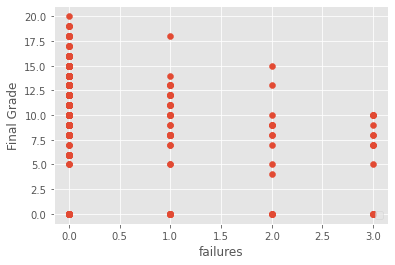

In [6]:
#Import Library
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use("ggplot")

data = pd.read_csv("student-mat.csv", sep=";")

predict = "G3"

data = data[["G1", "G2", "absences","failures", "studytime","G3"]]
data = shuffle(data) # Optional - shuffle the data

x = np.array(data.drop([predict], 1))
y =np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)


# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

# LOAD MODEL
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)


print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])


# Drawing and plotting model
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()